In [19]:
import numpy as np
from numpy import *
import pandas as pd
from sklearn.datasets import fetch_mldata
import sklearn.preprocessing
from matplotlib import pyplot as plt
%matplotlib inline

## Copied from hw4.py (external file)

In [6]:
mnist = fetch_mldata('MNIST original')
data = mnist['data']
labels = mnist['target']

neg, pos = 0,8
train_idx = np.random.RandomState(0).permutation(np.where((labels[:60000] == neg) | (labels[:60000] == pos))[0])
test_idx = np.random.RandomState(0).permutation(np.where((labels[60000:] == neg) | (labels[60000:] == pos))[0])

train_data_size = 2000
train_data_unscaled = data[train_idx[:train_data_size], :].astype(float)
train_labels = (labels[train_idx[:train_data_size]] == pos)*2-1

test_data_size = 2000
test_data_unscaled = data[60000+test_idx[:test_data_size], :].astype(float)
test_labels = (labels[60000+test_idx[:test_data_size]] == pos)*2-1

# Preprocessing
train_data = sklearn.preprocessing.scale(train_data_unscaled, axis=0, with_std=False)
test_data = sklearn.preprocessing.scale(test_data_unscaled, axis=0, with_std=False)

# PCA

In [7]:
def pca(data, k):
    ''' performs pca on the given data, returns set of eigenvectors and their corresponding eigenvalues'''
    cov = np.dot(data.T, data)/data.shape[0]
    u, s, v = np.linalg.svd(cov)
    best_PC = u[:,:k]
    best_EV = s[:k]
    return best_PC, best_EV

## Q6(a) PCA on training set 

In [20]:
def q6_mean_digit(digit_data, digit='8'):
    ''' plots the mean digit, given the data'''
    plt.figure()
    mean_img = np.mean(digit_data, axis=0)
    plt.imshow(reshape(mean_img,(28,28)), interpolation='nearest', cmap='Greys')
    plt.title('mean img of digit '+digit)
    plt.savefig('q6_mean_img_digit'+digit+'_figure.png')

In [21]:
def q6_plot_digit_by_PC(best_PC, k=5, digit='8'):
    ''' plot the given digit by given principal components'''
    for i in range(k):
        plt.figure()
        plt.imshow(reshape(best_PC[:,i],(28,28)), interpolation='nearest', cmap='Greys')
        plt.title('this is the '+str(i+1)+' eigenvector of '+digit)
        plt.savefig('q6_digit_'+digit+'PC'+str(i+1)+'_figure.png')

In [22]:
def q6_plot_eigenvalue(best_EV, digit='8'):
    ''' plot eigenvalue graph'''
    plt.figure()
    plt.plot(range(len(best_EV)), best_EV)
    plt.title('eigenvalues of digit '+digit)
    plt.xlabel('dimension')
    plt.ylabel('eigenvalue')
    plt.savefig('q6_eigenvalue_digit_'+digit+'_figure.png')

In [23]:
def q6_plot_scatter_2PC(first_proj, second_proj, train_labels):
    ''' plot the scatter of the two first principal components'''
    plt.figure()
    plt.scatter(first_proj, second_proj, c=map(lambda x: 'r' if x else 'b' ,(train_labels==1)))
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('scatter plot using the first two eigenvectors')
    plt.savefig('q6_2PC_scatter_figure.png')

In [24]:
def q6_plot_digit(data, digit='8'):
    '''simply plot the given digit'''
    plt.figure()
    plt.imshow(reshape(data,(28,28)), interpolation='nearest', cmap='Greys')
    plt.title('img of digit '+digit)
    plt.savefig('q6_original_digit_'+digit+'_figure.png')

### mean image of '8'

In [25]:
eight_digit = train_data[train_labels == 1]
best_PC, best_EV = pca(eight_digit, k=100)

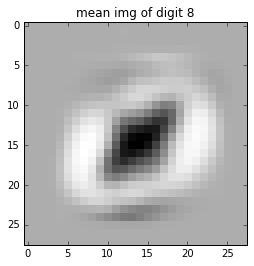

In [26]:
q6_mean_digit(eight_digit)

### first 5 eigenvectors

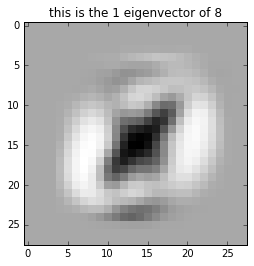

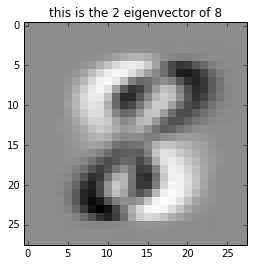

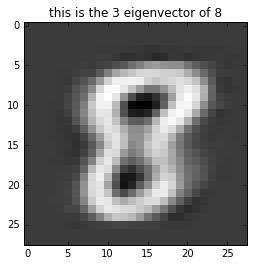

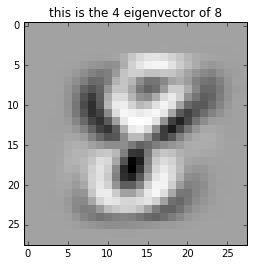

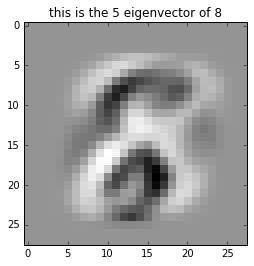

In [27]:
q6_plot_digit_by_PC(best_PC, k=5)

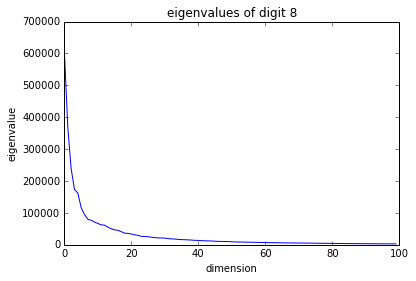

In [28]:
q6_plot_eigenvalue(best_EV)

### Mean digit 0

In [29]:
zero_digit = train_data[train_labels == -1]
best_PC, best_EV = pca(zero_digit, k=100)

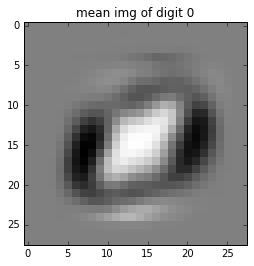

In [30]:
q6_mean_digit(zero_digit, digit='0')

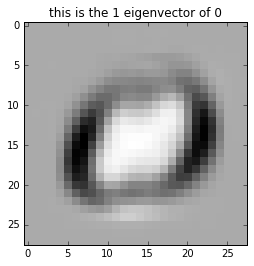

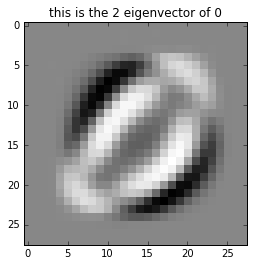

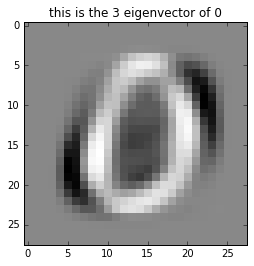

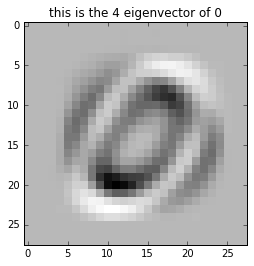

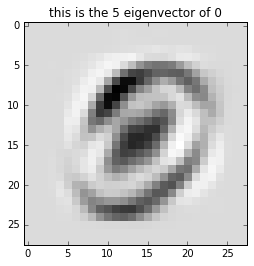

In [31]:
q6_plot_digit_by_PC(best_PC, digit='0')

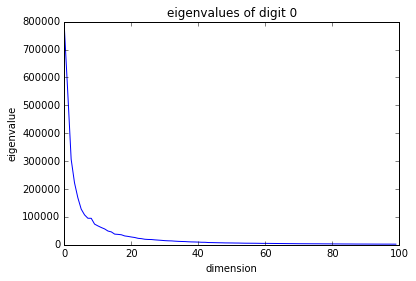

In [32]:
q6_plot_eigenvalue(best_EV, digit='0')

### Both 8 & 0

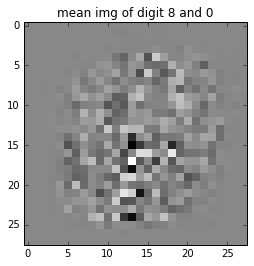

In [33]:
best_PC, best_EV = pca(train_data, k=100)
q6_mean_digit(train_data, digit = '8 and 0')

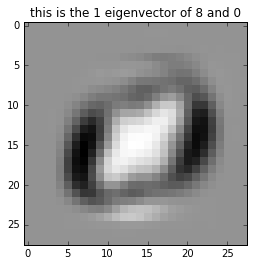

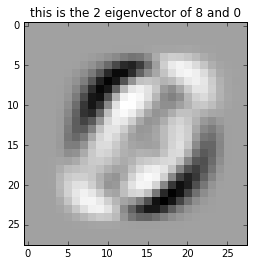

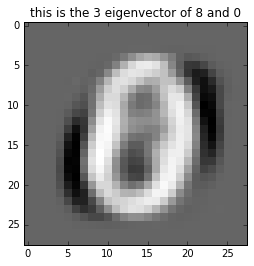

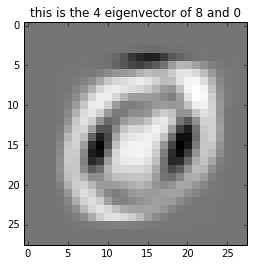

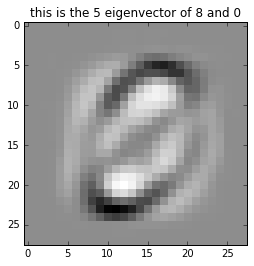

In [34]:
q6_plot_digit_by_PC(best_PC, digit='8 and 0')

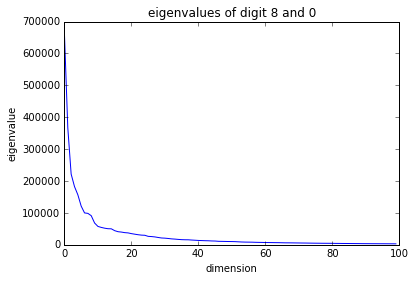

In [35]:
q6_plot_eigenvalue(best_EV, digit ='8 and 0')

### Projection using the first two PCs

In [36]:
best_PC, best_EV = pca(train_data, k=100)

In [37]:
first_PC = best_PC[:,0]
second_PC = best_PC[:,1]
first_proj = np.dot(train_data,first_PC)
second_proj = np.dot(train_data,second_PC)

### Reconstruct images

In [38]:
def q6_reconstruct(data, best_PC, k):
    ''' reconstruct the digit as the sum of the projection on the given k'''
    shrink = np.dot(data,best_PC[:,:k])
    reconstruct = np.dot(shrink, best_PC[:,:k].T)
    return reconstruct

In [39]:
np.random.seed(777)
positive_img = train_data[np.random.choice(np.where(train_labels == 1)[0], size=2)]
negative_img = train_data[np.random.choice(np.where(train_labels == -1)[0], size=2)]

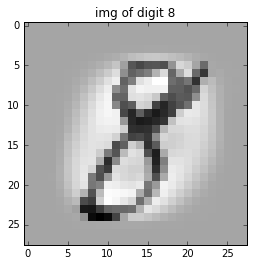

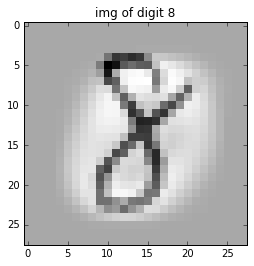

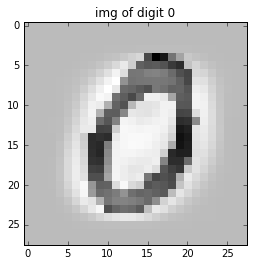

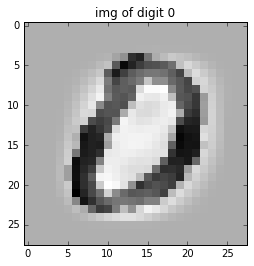

In [40]:
for j in range(len(positive_img)):
    q6_plot_digit(positive_img[j])
    
for j in range(len(negative_img)):
    q6_plot_digit(negative_img[j], digit='0')

In [41]:
best_PC, best_EV = pca(train_data, k=50)

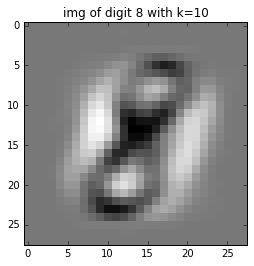

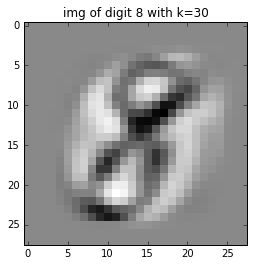

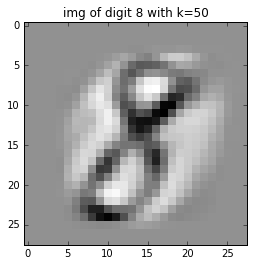

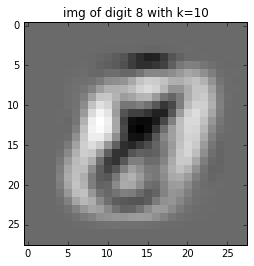

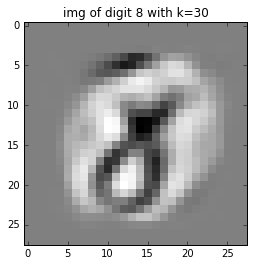

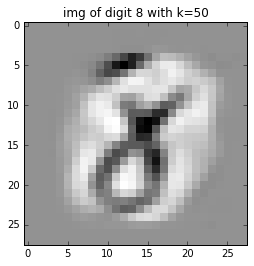

In [42]:
k_values = [10,30,50]
for k in k_values:
    vec = q6_reconstruct(positive_img[0], best_PC, k)
    q6_plot_digit(vec, digit='8 with k='+str(k))
    
for k in k_values:
    vec = q6_reconstruct(positive_img[1], best_PC,  k=k)
    q6_plot_digit(vec, digit='8 with k='+str(k))

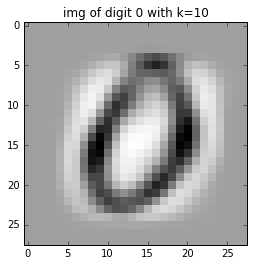

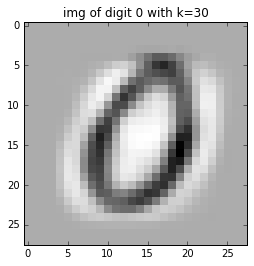

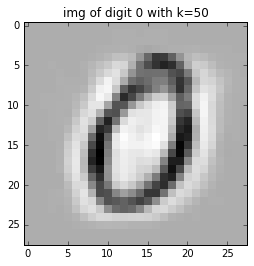

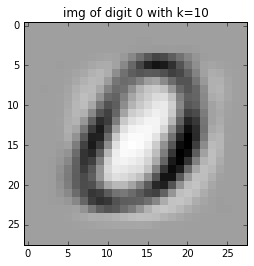

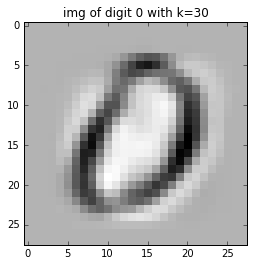

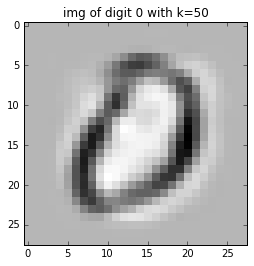

In [44]:
for k in k_values:
    vec = q6_reconstruct(negative_img[0], best_PC, k)
    q6_plot_digit(vec, digit='0 with k='+str(k))
    
for k in k_values:
    vec = q6_reconstruct(negative_img[1], best_PC, k)
    q6_plot_digit(vec, digit='0 with k='+str(k))